<h1> Comprendre le langage SQL </h1>

- SQL  est un langage informatique normalisé servant à exploiter des bases de données relationnelles. 

- La partie langage de manipulation des données de SQL permet de rechercher, d'ajouter, de modifier ou de supprimer des données dans les bases de données relationnelles.


<img src="./figures/Python-SQL-1.jpg" alt="SQL" width="80%" height="80%">

<h2>12.1- Connexion en Python à une base de données avec Pandas </h2>

On va travailler avec une base de données open-source de Kaggle.
https://www.kaggle.com/dimarudov/data-analysis-using-sql

<h3> 12.1.1- Connexion à la base de données locale</h3>


In [1]:
import sqlite3
path = 'database.sqlite'
conn = sqlite3.connect(path) # on crée une connexion 
conn

In [2]:
#importer une table complète
import pandas as pd

teams = pd.read_sql("""SELECT *
                        FROM Team;""", conn)
teams.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [3]:
#Selectionner certaines colonnes d'une table
teams = pd.read_sql("""SELECT team_long_name,team_short_name
                        FROM Team;""", conn)
teams.head()

,team_long_name,team_short_name
0,KRC Genk,GEN
1,Beerschot AC,BAC
2,SV Zulte-Waregem,ZUL
3,Sporting Lokeren,LOK
4,KSV Cercle Brugge,CEB


In [4]:
#Acceder à une autre table
players = pd.read_sql("""SELECT *
                        FROM Player_Attributes;""", conn)
players.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


Si aucune documentation sur la base de données: 

In [5]:
#Afficher toutes les tables d'une base de données
tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
tables.head()

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...


<h3> 12.1.2- Faire des filtres sur une base de données</h3>

- Appliquer un filtre

In [6]:
players = pd.read_sql("""SELECT id,overall_rating
                        FROM Player_Attributes
                        WHERE overall_rating > 90;""", conn)
players.head()

,id,overall_rating
0,6532,91
1,6533,91
2,12789,91
3,12790,91
4,33331,93


- Appliquer un filtre et mettre une limite sur le nombre de résultats

In [7]:
players = pd.read_sql("""SELECT id,overall_rating
                        FROM Player_Attributes
                        WHERE overall_rating > 90
                        LIMIT 5;""", conn)
players

,id,overall_rating
0,6532,91
1,6533,91
2,12789,91
3,12790,91
4,33331,93


- Appliquer un filtre avec conditions multiples

In [8]:
players = pd.read_sql("""SELECT id,overall_rating,preferred_foot
                        FROM Player_Attributes
                        WHERE overall_rating > 80 and preferred_foot=='left'
                        LIMIT 5;""", conn)
players

,id,overall_rating,preferred_foot
0,1744,82,left
1,1745,81,left
2,1746,81,left
3,3245,83,left
4,3248,86,left


- Conditions multiples sans avoir besoin de selectionner les colonnes

In [9]:
players = pd.read_sql("""SELECT id
                        FROM Player_Attributes
                        WHERE overall_rating > 80 and preferred_foot=='left'
                        LIMIT 5;""", conn)
players

,id
0,1744
1,1745
2,1746
3,3245
4,3248


- Gérer les priorités dans les conditions

Comme en mathématique avec des parenthèses. 

In [10]:
players = pd.read_sql("""SELECT id,overall_rating,preferred_foot,attacking_work_rate
                        FROM Player_Attributes
                        WHERE (preferred_foot=='right') and (overall_rating > 80 or attacking_work_rate=='medium')
                        LIMIT 5;""", conn)
players

,id,overall_rating,preferred_foot,attacking_work_rate
0,1,67,right,medium
1,2,67,right,medium
2,3,62,right,medium
3,4,61,right,medium
4,5,61,right,medium


- Filtre sur une série de valeurs en appliquant une liste:

In [11]:
countries = pd.read_sql("""SELECT *
                        FROM Country;""", conn)
countries

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [12]:
countries = pd.read_sql("""SELECT *
                        FROM Country
                        WHERE (name IN ('Belgium','France','Portugal')) ;""", conn)
countries

,id,name
0,1,Belgium
1,4769,France
2,17642,Portugal


- Trier les données : ASC DSC

In [13]:
#Changer le tri 
players = pd.read_sql("""SELECT id,overall_rating,preferred_foot,attacking_work_rate
                        FROM Player_Attributes
                        ORDER BY overall_rating ASC
                        LIMIT 5;""", conn)
players

,id,overall_rating,preferred_foot,attacking_work_rate
0,484,None,None,None
1,984,None,None,None
2,1753,None,None,None
3,2090,None,None,None
4,2483,None,None,None


Ajout d'un filtre sur les valeurs nulles pour les ignorer:

In [14]:
players = pd.read_sql("""SELECT id,overall_rating,preferred_foot,attacking_work_rate
                        FROM Player_Attributes
                        WHERE overall_rating IS NOT NULL
                        ORDER BY overall_rating ASC
                        LIMIT 5;""", conn)
players

,id,overall_rating,preferred_foot,attacking_work_rate
0,57834,33,right,medium
1,57835,33,right,medium
2,76552,35,right,medium
3,76553,35,right,medium
4,131895,35,left,high


Changer le tri:

In [15]:
players = pd.read_sql("""SELECT id,overall_rating,preferred_foot,attacking_work_rate
                        FROM Player_Attributes
                        ORDER BY overall_rating DESC
                        LIMIT 5;""", conn)
players

,id,overall_rating,preferred_foot,attacking_work_rate
0,102483,94,left,medium
1,102484,94,left,medium
2,102485,94,left,medium
3,102492,94,left,medium
4,102493,94,left,high


- Faire des doubles tris

In [16]:
players = pd.read_sql("""SELECT id,overall_rating,preferred_foot,attacking_work_rate,standing_tackle
                        FROM Player_Attributes
                        ORDER BY overall_rating DESC,standing_tackle ASC
                        LIMIT 10;""", conn)
players

,id,overall_rating,preferred_foot,attacking_work_rate,standing_tackle
0,102492,94,left,medium,21
1,102493,94,left,high,21
2,102494,94,left,high,21
3,102495,94,left,high,21
4,102496,94,left,high,21
5,102497,94,left,high,21
6,102498,94,left,high,21
7,102499,94,left,high,21
8,102500,94,left,high,21
9,102483,94,left,medium,23


<h3> 12.1.3- Faire des calculs en SQL</h3>

In [17]:
match = pd.read_sql("""SELECT *
                        FROM match;""", conn)
list(match.columns)

['id',
 'country_id',
 'league_id',
 'season',
 'stage',
 'date',
 'match_api_id',
 'home_team_api_id',
 'away_team_api_id',
 'home_team_goal',
 'away_team_goal',
 'home_player_X1',
 'home_player_X2',
 'home_player_X3',
 'home_player_X4',
 'home_player_X5',
 'home_player_X6',
 'home_player_X7',
 'home_player_X8',
 'home_player_X9',
 'home_player_X10',
 'home_player_X11',
 'away_player_X1',
 'away_player_X2',
 'away_player_X3',
 'away_player_X4',
 'away_player_X5',
 'away_player_X6',
 'away_player_X7',
 'away_player_X8',
 'away_player_X9',
 'away_player_X10',
 'away_player_X11',
 'home_player_Y1',
 'home_player_Y2',
 'home_player_Y3',
 'home_player_Y4',
 'home_player_Y5',
 'home_player_Y6',
 'home_player_Y7',
 'home_player_Y8',
 'home_player_Y9',
 'home_player_Y10',
 'home_player_Y11',
 'away_player_Y1',
 'away_player_Y2',
 'away_player_Y3',
 'away_player_Y4',
 'away_player_Y5',
 'away_player_Y6',
 'away_player_Y7',
 'away_player_Y8',
 'away_player_Y9',
 'away_player_Y10',
 'away_player

- Faire une somme sur une colonne: 

In [18]:
match = pd.read_sql("""SELECT SUM(home_team_goal),SUM(away_team_goal)
                        FROM match;""", conn)
match

,SUM(home_team_goal),SUM(away_team_goal)
0,40127,30160


- Compter le nombre de lignes

In [19]:
match = pd.read_sql("""SELECT COUNT(*)
                        FROM match;""", conn)
match

,COUNT(*)
0,25979


In [20]:
#compter nombre de lignes dans une colonne ou dans une table avec filtre
match = pd.read_sql("""SELECT COUNT(*)
                        FROM match
                        WHERE home_team_goal > 2;""", conn)
match

,COUNT(*)
0,5344


In [21]:
#Trouver le maximum d'une colonne
match = pd.read_sql("""SELECT MAX(home_team_goal),MAX(away_team_goal)
                        FROM match;""", conn)
match

,MAX(home_team_goal),MAX(away_team_goal)
0,10,9


In [22]:
#Faire une moyenne
match = pd.read_sql("""SELECT AVG(home_team_goal),AVG(away_team_goal)
                        FROM match;""", conn)
match

,AVG(home_team_goal),AVG(away_team_goal)
0,1.544594,1.160938


<h3> 12.1.4- Grouper des données: Group by et les Alias</h3>

- Grouper les données via une dimension: par saison ici

In [23]:
#Grouper les données via une dimension
match = pd.read_sql("""SELECT season, AVG(home_team_goal),AVG(away_team_goal)
                        FROM match
                        GROUP BY season;""", conn)
match

,season,AVG(home_team_goal),AVG(away_team_goal)
0,2008/2009,1.505412,1.101924
1,2009/2010,1.541176,1.131269
2,2010/2011,1.548466,1.135276
3,2011/2012,1.572671,1.143789
4,2012/2013,1.550000,1.222699
5,2013/2014,1.578826,1.187995
6,2014/2015,1.520301,1.155489
7,2015/2016,1.543897,1.210764


- Renommer les variables avec les alias

In [24]:
match = pd.read_sql("""SELECT AVG(home_team_goal) AS Moyenne_buts_domicile,AVG(away_team_goal) AS Moyenne_buts_exterieur
                        FROM match
                        GROUP BY season;""", conn)
match

,Moyenne_buts_domicile,Moyenne_buts_exterieur
0,1.505412,1.101924
1,1.541176,1.131269
2,1.548466,1.135276
3,1.572671,1.143789
4,1.550000,1.222699
5,1.578826,1.187995
6,1.520301,1.155489
7,1.543897,1.210764


- Faire des filtres sur des alias

In [25]:
#match = pd.read_sql("""SELECT season, SUM(home_team_goal) AS Total_buts_domicile,SUM(away_team_goal) AS Total_buts_exterieur
#                        FROM match
#                        GROUP BY season
#                        WHERE Total_buts_domicile > 5000;""", conn)
#match

En cas de groupe by, on ne peut plus utiliser le filtre WHERE mais HAVING

In [26]:
#Faire des filtres sur des alias
match = pd.read_sql("""SELECT season, SUM(home_team_goal) AS Total_buts_domicile,SUM(away_team_goal) AS Total_buts_exterieur
                        FROM match
                        GROUP BY season
                        HAVING Total_buts_domicile > 5000;""", conn)
match

,season,Total_buts_domicile,Total_buts_exterieur
0,2008/2009,5007,3665
1,2010/2011,5048,3701
2,2011/2012,5064,3683
3,2012/2013,5053,3986
4,2014/2015,5055,3842
5,2015/2016,5135,4027


<h3> 12.1.5- Concept de clé primaire et étrangère</h3>

- Avoir des infos sur une table

In [27]:
infos = pd.read_sql("""PRAGMA table_info(match);""", conn)
infos.head()

,cid,name,type,notnull,dflt_value,pk
0,0,id,INTEGER,0,None,1
1,1,country_id,INTEGER,0,None,0
2,2,league_id,INTEGER,0,None,0
3,3,season,TEXT,0,None,0
4,4,stage,INTEGER,0,None,0


- concept de clé primaire (primary key) et de clé étrangère (foreign key)

In [28]:
#concept de clé primaire (primary key) et de clé étrangère (foreign key)
match = pd.read_sql("""SELECT *
                        FROM match;""", conn)
match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [29]:
infos = pd.read_sql("""PRAGMA table_info(Country);""", conn)
infos

,cid,name,type,notnull,dflt_value,pk
0,0,id,INTEGER,0,None,1
1,1,name,TEXT,0,None,0


In [30]:
countries = pd.read_sql("""SELECT *
                        FROM Country ;""", conn)
countries

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


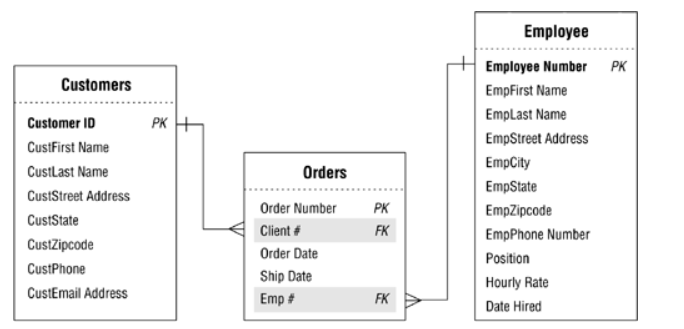

<h3> 12.1.6- Faire des jointures en SQL
    
    - utilisation des tables MATCH, COUNTRY et TEAM

In [31]:
match = pd.read_sql("""SELECT country.*,* FROM MATCH
                        INNER JOIN country
                        ON match.country_id == country.id;""", conn)
match.head()

,id,name,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,...,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,id,name
0,1,Belgium,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,...,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20,1,Belgium
1,1,Belgium,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,...,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60,1,Belgium
2,1,Belgium,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,...,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75,1,Belgium
3,1,Belgium,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,...,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50,1,Belgium
4,1,Belgium,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,...,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67,1,Belgium


In [32]:
#Selectionner uniquement certaines tables 
match = pd.read_sql("""SELECT home_team_api_id,away_team_api_id,home_team_goal,away_team_goal, country.name FROM MATCH
                        INNER JOIN country
                        ON match.country_id == country.id;""", conn)
match.head()

,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,name
0,9987,9993,1,1,Belgium
1,10000,9994,0,0,Belgium
2,9984,8635,0,3,Belgium
3,9991,9998,5,0,Belgium
4,7947,9985,1,3,Belgium


In [33]:
team = pd.read_sql("""SELECT *
                        FROM team;""", conn)
team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [34]:
#Les jointures multiples
match = pd.read_sql("""SELECT team.team_long_name,away_team_api_id,home_team_goal,away_team_goal, country.name FROM MATCH
                        INNER JOIN country ON match.country_id == country.id
                        INNER JOIN team ON match.home_team_api_id == team.team_api_id;""", conn)
match.head()

,team_long_name,away_team_api_id,home_team_goal,away_team_goal,name
0,KRC Genk,9993,1,1,Belgium
1,SV Zulte-Waregem,9994,0,0,Belgium
2,KSV Cercle Brugge,8635,0,3,Belgium
3,KAA Gent,9998,5,0,Belgium
4,FCV Dender EH,9985,1,3,Belgium


In [35]:
#Les jointures multiples sur une même table
match = pd.read_sql("""SELECT tHome.team_long_name,tAway.team_long_name,home_team_goal,away_team_goal, country.name FROM MATCH
                        INNER JOIN country ON match.country_id == country.id
                        INNER JOIN team tHome ON match.home_team_api_id == tHome.team_api_id
                        INNER JOIN team tAway ON match.away_team_api_id == tAway.team_api_id;""", conn)
match.head()

,team_long_name,team_long_name,home_team_goal,away_team_goal,name
0,KRC Genk,Beerschot AC,1,1,Belgium
1,SV Zulte-Waregem,Sporting Lokeren,0,0,Belgium
2,KSV Cercle Brugge,RSC Anderlecht,0,3,Belgium
3,KAA Gent,RAEC Mons,5,0,Belgium
4,FCV Dender EH,Standard de Liège,1,3,Belgium


In [36]:
#Les jointures multiples avec Alias
match = pd.read_sql("""SELECT tHome.team_long_name AS equipe_domicile,tAway.team_long_name AS equipe_exterieur,home_team_goal,away_team_goal, country.name FROM MATCH
                        INNER JOIN country ON match.country_id == country.id
                        INNER JOIN team AS tHome ON match.home_team_api_id == tHome.team_api_id
                        INNER JOIN team AS tAway ON match.away_team_api_id == tAway.team_api_id;""", conn)
match.head()

,equipe_domicile,equipe_exterieur,home_team_goal,away_team_goal,name
0,KRC Genk,Beerschot AC,1,1,Belgium
1,SV Zulte-Waregem,Sporting Lokeren,0,0,Belgium
2,KSV Cercle Brugge,RSC Anderlecht,0,3,Belgium
3,KAA Gent,RAEC Mons,5,0,Belgium
4,FCV Dender EH,Standard de Liège,1,3,Belgium


In [37]:
#Les jointures multiples avec filtres
match = pd.read_sql("""SELECT tHome.team_long_name AS equipe_domicile,tAway.team_long_name AS equipe_exterieur,home_team_goal,away_team_goal, country.name FROM MATCH
                        INNER JOIN country ON match.country_id == country.id
                        INNER JOIN team AS tHome ON match.home_team_api_id == tHome.team_api_id
                        INNER JOIN team AS tAway ON match.away_team_api_id == tAway.team_api_id
                        WHERE country.name == 'France' AND home_team_goal > 2;""", conn)
match.head()

,equipe_domicile,equipe_exterieur,home_team_goal,away_team_goal,name
0,Olympique Lyonnais,Toulouse FC,3,0,France
1,Stade Rennais FC,Olympique de Marseille,4,4,France
2,FC Lorient,FC Nantes,3,0,France
3,Girondins de Bordeaux,Le Havre AC,4,0,France
4,AS Monaco,AS Nancy-Lorraine,3,1,France


Les autres types de jointures
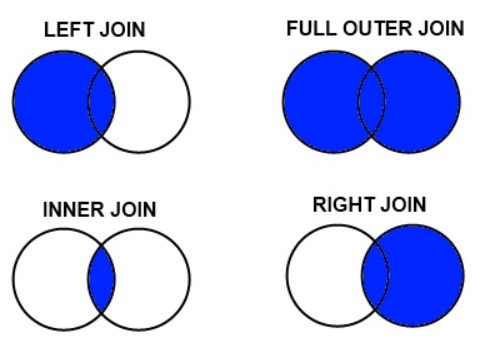

<h2>12.2- Créer un curseur et exécuter une requête SQL sur Python </h2>

- permet de se connecter à une base de données
- permet d'exécuter une requête auprès de la base de données
- permet d'analyser les résultats de la base de données
- permet de convertir les résultats en objets python
- permet de stocker les résultats en variables locales


In [38]:
path = './SQL/jobs.db/jobs.db'
connexion = sqlite3.connect(path) # connect() on crée une instance sqlite3 qu'on assigne à une variable 'connexion'
connexion

In [39]:
# on crée un curseur de la classe cursor()
cursor = connexion.cursor()

In [40]:
# on crée une requête SQL qu'on assigne à la variable query en tant que chaîne de caractères - string
query = "select * from recent_grads;"

In [41]:
# execution de la requête SQL située dans la variable query 
# le curseur convertit le résultat en tuple() et les stocke dans une variable locale
cursor.execute(query)

In [42]:
# on va chercher maintenant les résultats de la variable locale sous forme de liste de tuples()
results = cursor.fetchall()

In [43]:
results[0]

(0,
 1,
 2419,
 'PETROLEUM ENGINEERING',
 'Engineering',
 2339,
 36,
 2057,
 282,
 0.120564344,
 1976,
 1849,
 270,
 1207,
 37,
 0.018380527,
 110000,
 95000,
 125000,
 1534,
 364,
 193)

<b>Exercice:</b> 

- Ecrire une requête qui retourne toutes les valeurs de la colonne Major depuis la table recent_grads
- Stocker les résultats (list de tuples) et assigner les à la variable majors. 
- afficher les 5 premiers tuples résultats de la major 

In [44]:
path = './SQL/jobs.db/jobs.db'
connexion = sqlite3.connect(path)
cursor = connexion.cursor()
query = "select Major from recent_grads;"
major = cursor.execute(query).fetchall()
print(major[0:5])

[('PETROLEUM ENGINEERING',), ('MINING AND MINERAL ENGINEERING',), ('METALLURGICAL ENGINEERING',), ('NAVAL ARCHITECTURE AND MARINE ENGINEERING',), ('CHEMICAL ENGINEERING',)]


<h3>12.2.1- Chercher un certain nombre de résultats </h3>

- fetchone(): méthode pour aller chercher un résultat
- fetchmany(n): méthode pour aller chercher 'n' résultats

In [45]:
path = './SQL/jobs.db/jobs.db'
connexion = sqlite3.connect(path)
cursor = connexion.cursor()
query = "select Major, Major_category from recent_grads;"
cursor.execute(query)

In [46]:
major1 = cursor.fetchone()
major2 = cursor.fetchone()
print(major1)
print(major2)

('PETROLEUM ENGINEERING', 'Engineering')
('MINING AND MINERAL ENGINEERING', 'Engineering')


In [47]:
major3 = cursor.fetchmany(5)
print(major3)

[('METALLURGICAL ENGINEERING', 'Engineering'), ('NAVAL ARCHITECTURE AND MARINE ENGINEERING', 'Engineering'), ('CHEMICAL ENGINEERING', 'Engineering'), ('NUCLEAR ENGINEERING', 'Engineering'), ('ACTUARIAL SCIENCE', 'Business')]


<h3>12.2.2- Stopper la connexion à la base de données </h3>

- méthode close()

### Cas pratique: 
- connectez-vous à la base de données jobs2.db
- Ecrire et exécuter une requête qui retourne toutes les majors dans l'ordre alphabétique inverse
- Assigner le résultat complet à la variable result
- Enfin, fermer la connexion à la base de données



In [48]:
import sqlite3
path = './SQL/jobs.db/jobs.db'
cursor = sqlite3.connect(path).cursor()

query = "select Major from recent_grads order by Major DESC;"

cursor.execute(query)
result = cursor.fetchall()
connexion.close()
result

[('ZOOLOGY',),
 ('VISUAL AND PERFORMING ARTS',),
 ('UNITED STATES HISTORY',),
 ('TREATMENT THERAPY PROFESSIONS',),
 ('TRANSPORTATION SCIENCES AND TECHNOLOGIES',),
 ('THEOLOGY AND RELIGIOUS VOCATIONS',),
 ('TEACHER EDUCATION: MULTIPLE LEVELS',),
 ('STUDIO ARTS',),
 ('STATISTICS AND DECISION SCIENCE',),
 ('SPECIAL NEEDS EDUCATION',),
 ('SOIL SCIENCE',),
 ('SOCIOLOGY',),
 ('SOCIAL WORK',),
 ('SOCIAL SCIENCE OR HISTORY TEACHER EDUCATION',),
 ('SOCIAL PSYCHOLOGY',),
 ('SECONDARY TEACHER EDUCATION',),
 ('SCIENCE AND COMPUTER TEACHER EDUCATION',),
 ('SCHOOL STUDENT COUNSELING',),
 ('PUBLIC POLICY',),
 ('PUBLIC ADMINISTRATION',),
 ('PSYCHOLOGY',),
 ('PRE-LAW AND LEGAL STUDIES',),
 ('POLITICAL SCIENCE AND GOVERNMENT',),
 ('PLANT SCIENCE AND AGRONOMY',),
 ('PHYSIOLOGY',),
 ('PHYSICS',),
 ('PHYSICAL SCIENCES',),
 ('PHYSICAL FITNESS PARKS RECREATION AND LEISURE',),
 ('PHYSICAL AND HEALTH EDUCATION TEACHING',),
 ('PHILOSOPHY AND RELIGIOUS STUDIES',),
 ('PHARMACY PHARMACEUTICAL SCIENCES AND ADMINIST

### Cas pratique2: 

- base de données factbook.db

In [49]:
import pandas as pd 
import sqlite3
import math
 
# Connexion à la base de données factbook.db
path = './SQL/jobs.db/factbook.db'
connexion = sqlite3.connect(path)

# Lecture des données de la table facts dans un tableau pandas
a = pd.read_sql_query('SELECT * FROM facts;', con = connexion)
 
# Calcul théorique:
# N = N0*e**(rt)
# N = population finale
# N0 = population initiale
# e = constante
# r = taux de croissance annuelle
# t = nombre d'années entre l'estimation et l'initiale
# 5000 habitants, taux de croissance t de 4% 2015 --> 2050, donc t = 35
# N = 5000 * e ** (0.04 * 35)
 
# définition de la fonction qui calcule une estimation de la population en 2015 suivant le calcul ci-dessus:
def pop_growth(x):
 return x['population'] * math.e ** ((x['population_growth']/100)* 35)
 
# Application de la fonction pop_growth à chaque pays + création d'une colonne pop_2050 contenant les résultats
a['pop_2050'] = a.apply(lambda row: pop_growth(row), axis=1)
 
# Suppression des lignes contenant des valeurs manquantes
a = a.dropna(axis = 0)
 
# On filtre les pays qui ont une surface terrestre > 0 et une population > 0
a = a[(a['area_land'] > 0) & (a['population'] > 0)]
 
# On trie les pays par population décroissante
b = a.sort_values(['pop_2050'], ascending = [False])
 
# On assigne à la variable b les noms des pays correspondants limités à 10 valeurs
b = b['name'].iloc[0:9]
 
# On affiche le résultat final
b


76                                 India
36                                 China
128                              Nigeria
185                        United States
77                             Indonesia
131                             Pakistan
13                            Bangladesh
23                                Brazil
39     Congo, Democratic Republic of the
Name: name, dtype: object

In [50]:
a

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at,pop_2050
0,1,af,Afghanistan,652230.0,652230.0,0.0,32564342.0,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734,7.334819e+07
1,2,al,Albania,28748.0,27398.0,1350.0,3029278.0,0.30,12.92,6.58,3.30,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082,3.364651e+06
2,3,ag,Algeria,2381741.0,2381741.0,0.0,39542166.0,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286,7.529153e+07
3,4,an,Andorra,468.0,468.0,0.0,85580.0,0.12,8.13,6.96,0.00,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945,8.925091e+04
4,5,ao,Angola,1246700.0,1246700.0,0.0,19625353.0,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072,5.192614e+07
5,6,ac,Antigua and Barbuda,442.0,442.0,0.0,92436.0,1.24,15.85,5.69,2.21,2015-11-01 13:20:13.049627,2015-11-01 13:20:13.049627,1.426675e+05
6,7,ar,Argentina,2780400.0,2736690.0,43710.0,43431886.0,0.93,16.64,7.33,0.00,2015-11-01 13:20:18.233063,2015-11-01 13:20:18.233063,6.014112e+07
7,8,am,Armenia,29743.0,28203.0,1540.0,3056382.0,0.15,13.61,9.34,5.80,2015-11-01 13:20:23.048753,2015-11-01 13:20:23.048753,3.221129e+06
8,9,as,Australia,7741220.0,7682300.0,58920.0,22751014.0,1.07,12.15,7.14,5.65,2015-11-01 13:20:28.186341,2015-11-01 13:20:28.186341,3.308598e+07
9,10,au,Austria,83871.0,82445.0,1426.0,8665550.0,0.55,9.41,9.42,5.56,2015-11-01 13:20:33.093597,2015-11-01 13:20:33.093597,1.050504e+07


In [51]:
import sqlite3
import pandas as pd
 
connexion = sqlite3.connect('./SQL/jobs.db/factbook.db')
 
# On affiche dans un tableau pandas les sommes des surfaces terrestres et surfaces de l'eau pour chaque pays
a = pd.read_sql_query('SELECT SUM(area_land), SUM(area_water)FROM facts WHERE area_land != "";', con = connexion)
 
 
# On affiche le ratio Terre / Mer
print(a['SUM(area_land)']/a['SUM(area_water)'])

0    28.390657
dtype: float64


<h3>12.2.3- Calcul de statistiques en SQL </h3>

- moyenne
- somme 
- Min / Max
- Valeur unique d'une colonne

#### Compter le nombre de lignes en SQL

In [52]:
# calcul du nombre de valeurs non nulles
import sqlite3
connexion = sqlite3.connect('./SQL/jobs.db/factbook.db')
birth_rate_tuple = connexion.execute('SELECT COUNT(birth_rate)FROM facts;').fetchall()
birth_rate_tuple

[(228,)]

In [53]:
birth_rate_count = birth_rate_tuple[0][0] # première valeur du premier tuple
birth_rate_count

228

#### Trouver les valeurs minimales et maximales d'une colonne en SQL
- fonctions MIN() et MAX()

In [54]:
# calcul des valeurs minimales et maximales
import sqlite3
connexion = sqlite3.connect('./SQL/jobs.db/factbook.db')
population_grouwth_tuple = connexion.execute('select min(population_growth) from facts;').fetchall()
population_grouwth_min = population_grouwth_tuple[0][0]
population_grouwth_min

0.0

In [55]:
population_death_tuple = connexion.execute('select max(death_rate) from facts;').fetchall()
population_death_max = population_death_tuple[0][0]
population_death_max

14.89

#### Calculer des sommes et des moyennes en SQL
- fonctions SUM() et AVG()

In [56]:
import sqlite3
connexion = sqlite3.connect('./SQL/jobs.db/factbook.db')
area_land_sum_tuple = connexion.execute('select sum(area_land) from facts;').fetchall()
area_land_sum = area_land_sum_tuple[0][0]
area_land_sum

128584834

In [57]:
import sqlite3
connexion = sqlite3.connect('./SQL/jobs.db/factbook.db')
area_water_avg_tuple = connexion.execute('select avg(area_water) from facts;').fetchall()
area_water_avg = area_water_avg_tuple[0][0]
area_water_avg

19067.59259259259

In [58]:
connexion.close()

#### Combiner des fonctions sur une seule requête en SQL

In [59]:
import sqlite3
connexion = sqlite3.connect('./SQL/jobs.db/factbook.db')
facts_stats = connexion.execute('select avg(population), sum(population), max(birth_rate) from facts;').fetchall()
facts_stats

[(62094928.32231405, 15026972654, 45.45)]

In [60]:
mean_pop = facts_stats[0][0]
sum_pop = facts_stats[0][1]
max_birth_rate =  facts_stats[0][2]
print(mean_pop)
print(sum_pop)
print(max_birth_rate)

62094928.32231405
15026972654
45.45


#### Associer les fonctions de calcul avec la condition " where "

- WHERE
- Écrire une requête SQL qui calcule la moyenne de la colonne population_growth pour les pays ayant une population supérieure à 100000000 habitants 

In [61]:
import sqlite3
connexion = sqlite3.connect('./SQL/jobs.db/factbook.db')
pop_query = connexion.execute('select avg(population_growth) from facts where (population > 10000000);').fetchall()
population_growth = pop_query[0][0]
population_growth

1.4572222222222226

#### Sélectionner des éléments ou des données uniques 

- DISTINCT

In [62]:
import sqlite3
connexion = sqlite3.connect('./SQL/jobs.db/factbook.db')
unique_birth_rates = connexion.execute('select distinct birth_rate from facts ;').fetchall()

#### Associer des fonctions de calcul avec la fonction DISTINCT

- Trouver la moyenne des valeurs distinctes de la colonne birth_rate pour lesquelles population est plus grand que 20 00 000
- Trouver la somme de toutes les valeurs distinctes de la colonne population pour lesquelles area_land est plus grand que 1000000

In [63]:
import sqlite3
connexion = sqlite3.connect('./SQL/jobs.db/factbook.db')
mean_birth_rate = connexion.execute('select avg(distinct birth_rate) from facts where population > 20000000 ;').fetchall()
mean_birth_rate[0][0]

20.43473684210527

In [64]:
import sqlite3
connexion = sqlite3.connect('./SQL/jobs.db/factbook.db')
cournt_population = connexion.execute('select sum(distinct population) from facts where area_land > 1000000 ;').fetchall()
cournt_population[0][0]

4233873015

#### Opérations mathématiques en SQL

- Afficher les valeurs de la colonne population_growth en millions (décimales)

In [65]:
import sqlite3
connexion = sqlite3.connect('./SQL/jobs.db/factbook.db')
population_million = connexion.execute('select  population_growth / 100000000.0 from facts ;').fetchall()
population_million[0][0]

2.32e-08

### Opérations mathématiques entre colonnes  SQL

- Ecrire une requête SQL qui calcule pour chaque pays le nombre d'habitants qu'il y aura l'année suivante 

In [66]:
import sqlite3
connexion = sqlite3.connect('./SQL/jobs.db/factbook.db')
population_next_year = connexion.execute('select name, ((population_growth + 1) * population) from facts ;').fetchall()
#population_next_year

#### Statistiques sur des groupes de données

-group by: permet de faire des statistiques sur des groupes

In [67]:
connexion = sqlite3.connect('./SQL/jobs.db/jobs.db')
cursor = connexion.cursor()
query = "select Major_category, sum(Employed) from recent_grads group by major_category;"
major = cursor.execute(query).fetchall()
print(major[0:5])

[('Agriculture & Natural Resources', 66943), ('Arts', 288114), ('Biology & Life Science', 302797), ('Business', 1088742), ('Communications & Journalism', 330660)]


- Trouver le pourcentage moyenne de femmes pour chaque catégorie de majors 

In [68]:
connexion = sqlite3.connect('./SQL/jobs.db/jobs.db')
cursor = connexion.cursor()
query = "select Major_category, avg(ShareWomen)*100 from recent_grads group by major_category;"
femme_pourcentage = cursor.execute(query).fetchall()
print(femme_pourcentage[0:5])

[('Agriculture & Natural Resources', 61.79384232), ('Arts', 56.185119574999995), ('Biology & Life Science', 58.4518475857143), ('Business', 40.50631853076923), ('Communications & Journalism', 64.383484025)]


#### Renommer les colonnes avec la commande AS

In [69]:
connexion = sqlite3.connect('./SQL/jobs.db/jobs.db')
cursor = connexion.cursor()
query = "select Major_category, avg(Employed) / avg(Total) as share_employed from recent_grads group by major_category;"
new_pourcentage = cursor.execute(query).fetchall()
new_pourcentage

[('Agriculture & Natural Resources', 0.8369862842425075),
 ('Arts', 0.8067482429367457),
 ('Biology & Life Science', 0.6671565365683841),
 ('Business', 0.8359659576036412),
 ('Communications & Journalism', 0.8422291333949735),
 ('Computers & Mathematics', 0.7956108197773972),
 ('Education', 0.858190149321534),
 ('Engineering', 0.7819666916550562),
 ('Health', 0.8033741337996244),
 ('Humanities & Liberal Arts', 0.7626382682895378),
 ('Industrial Arts & Consumer Services', 0.8226700668430581),
 ('Interdisciplinary', 0.7987150292778139),
 ('Law & Public Policy', 0.8083994483744353),
 ('Physical Sciences', 0.7506564085422069),
 ('Psychology & Social Work', 0.790724459311403),
 ('Social Science', 0.7575825619001975)]

#### Colonnes virtuelles et HAVING

- si colonne générée par group by et renommée par as , elle n'existe pas et on ne peut pas faire un tri avec where dessus
- pour cela on peut utiliser la commande HAVING: filtrer sur des commandes virtuelles

In [70]:
connexion = sqlite3.connect('./SQL/jobs.db/jobs.db')
cursor = connexion.cursor()
query = "select Major_category, avg(Employed) / avg(Total) as share_employed from recent_grads group by major_category HAVING share_employed > 0.8;"
new_pourcentage = cursor.execute(query).fetchall() 
new_pourcentage

[('Agriculture & Natural Resources', 0.8369862842425075),
 ('Arts', 0.8067482429367457),
 ('Business', 0.8359659576036412),
 ('Communications & Journalism', 0.8422291333949735),
 ('Education', 0.858190149321534),
 ('Health', 0.8033741337996244),
 ('Industrial Arts & Consumer Services', 0.8226700668430581),
 ('Law & Public Policy', 0.8083994483744353)]

In [71]:
connexion = sqlite3.connect('./SQL/jobs.db/jobs.db')
cursor = connexion.cursor()
query = "select Major_category, avg(Low_wage_jobs) / avg(Total) as share_low_wage from recent_grads group by major_category HAVING share_low_wage > 0.1;"
new_pourcentage = cursor.execute(query).fetchall() 
new_pourcentage

[('Arts', 0.16833085991095678),
 ('Communications & Journalism', 0.1263241815481876),
 ('Humanities & Liberal Arts', 0.13208721344194835),
 ('Industrial Arts & Consumer Services', 0.11571334076033978),
 ('Law & Public Policy', 0.11568503743572278),
 ('Psychology & Social Work', 0.11693384919554187),
 ('Social Science', 0.10223297343603174)]

#### Fonction ROUND

In [72]:
connexion = sqlite3.connect('./SQL/jobs.db/jobs.db')
cursor = connexion.cursor()
query = "select Major_category, round( avg( Low_wage_jobs) / avg(Total), 2 ) as share_low_wage from recent_grads group by major_category HAVING share_low_wage > 0.1;"
new_pourcentage = cursor.execute(query).fetchall() 
new_pourcentage
connexion.close()

In [74]:
import pandas as pd

teams = pd.read_sql("""SELECT *
                        FROM Team;""", conn)
teams.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
